# Template para Escoragem Batch

#### Carregando biblioteca de funções Turing

In [1]:
id_empresa = '1022'
import warnings
warnings.filterwarnings('ignore')
%run -i '/home/.Turing/TuringCredentialsAccess.py3'
%run -i '/home/.Turing/TuringLabFunctions.py3'

-------------------- LabTuring ---------------------------
----------- Exploração de Dados e Modelagem --------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 10/11/2019 -------------------------------
----------------------------------------------------------


#### Mapear bibliotecas Python necessárias

In [2]:
import pandas as pd
import numpy as np

#### Parêmtros do Projeto

In [3]:
#------ Modo Manual -----------------
nm_bucket = 'turing-bkt-treinamentos-prod'
bucket = nm_bucket
id_projeto = '1006'
nm_file = 'ABT_V01_BJ_VALID.csv'
targetname = 'TARGET'
abt_delimiter = ','
pct_amt = 1

In [4]:
################### Não alterar este parágrafo #####################################
#---------- Gerando Credenciais para Acesso Seguro ---------------------------------
id_modelo = id_projeto
schema = 'EMP_'+ id_empresa +'_Proj_'+ id_projeto
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)
schema_rds = 'EMP_'+id_empresa+'_Proj_'+id_projeto
mysq_conn,engine = TuringRDSManagementConn(id_empresa,schema_rds,turing_adm = 'N')
path_s3_wfile = 's3://'+nm_bucket+'/Projetos/'+'Projeto_'+id_projeto+'/Modelo_Id_'+id_projeto+'/Modeltrain/'
s3_path = path_s3_wfile
####################################################################################

Acesso RDS Turing Treinamentos


#### Lendo tabela de validação que será escorada

In [5]:
# Lendo tabela de desenvolvimento original do bucket da POC
path_file = 'Projetos/SCORE_BATCH/'+str(nm_file)
df_00 = TuringReadS3CSVFile(nm_bucket,path_file,sep=',')
df_00.shape

(92254, 150)

#### Verificando qual modelo está implantado para este projeto
    - Caso queira trocar o modelo volte ao Timeline Turing e implante um novo modelo desejado
    


In [6]:
modelos_implantados = pd.read_sql('SELECT lower(nm_modelo) as nm_modelo FROM model_deployment_tabaux where deploy_def ="S" limit 1', con=mysq_conn)
lista_modelos_implantados = modelos_implantados['nm_modelo']
nm_modelo = str(lista_modelos_implantados[0])
modelo = lista_modelos_implantados[0]
modelo_mem = TuringLoadModelFromS3(S3client,nm_bucket,id_modelo,id_projeto,nm_modelo)

#### Verificando parametrização do modelo implantado

In [7]:
modelo_mem

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Escorando tabela de validação

In [8]:
valid_score = TuringScoreBatchLab(df_00,nm_bucket,id_projeto,nm_file,id_empresa,targetname,abt_delimiter=',',pct_amt = 1)
valid_score.shape

Parametros ------------------------------------------------
Nome do Bucket: turing-bkt-treinamentos-prod
Id do Projeto: 1006
Id da Empresa: 1022
Id do Modelo: 1006
Schema RDS: EMP_1022_Proj_1006
Nome da ABT: ABT_V01_BJ_VALID.csv
Nome do target: TARGET
Delimitador: ,
Amostra: 1
-----------------------------------------------------------
Acesso RDS Turing Treinamentos
------------------- Metadados -------------------
('Quantidade de IDs: ', 1)
('Quantidade de Explicativas: ', 148)
('Quantidade de Rejeitadas: ', 0)
('TuringImportBatchData -> Qtd obs: ', 0)
('TuringImportBatchData -> Qtd vars: ', 20)
('Quantidade de variaveis a serem normalizadas: ', 148)
('df_dp_04 -----> ', (92254, 148))
Aplicando Normalizacao por WoE
('Criando tabela auxiliar para WoE: ', (92254, 1))
Normalizacao por WoE nao aplicada neste modelo
"None of [Index(['WoE_REG_CITY_NOT_LIVE_CITY', 'WoE_ENTRANCES_AVG',\n       'WoE_COMMONAREA_MODE', 'WoE_AVG_AMT_CREDIT_ACTIVE',\n       'WoE_LIVINGAPARTMENTS_MEDI', 'WoE_AVG_AM

(92254, 25)

In [9]:
valid_score.head()

,MAX_AMT_CREDIT_SUM,DAYS_EMPLOYED,EXT_SOURCE_2,MAX_DAYS_CREDIT,AVG_AMT_CREDIT_SUM_OVERDUE,OWN_CAR_AGE,EXT_SOURCE_3,EXT_SOURCE_1,AVG_AMT_CREDIT_SUM_DEBT,QT_CRED_Active,...,FLAG_DOCUMENT_3,AMT_CREDIT,AVG_AMT_CREDIT_Microloan,AMT_GOODS_PRICE,P_Target_0,P_Target_1,C_Target,SK_ID_CURR,PK_DATREF_XX,PK_DATVER_XX
0,2.530208e+06,-7.505915e+04,-8.043572,-10274.450774,-1.289755,-0.037520,11.607801,41.935442,-0.126851,-1.117165,...,-0.059367,8.166069e+07,-1.241661,0.854805,0.0,1.0,1,340490,20191110,2019-11-10 19:36:01
1,2.830966e+05,8.834815e+06,-7.841103,-4930.868782,-1.289755,-0.037464,16.177235,31.089410,0.263173,-0.796447,...,-0.059367,1.626707e+07,-1.241661,-0.176343,0.0,1.0,1,347397,20191110,2019-11-10 19:36:01
2,4.901139e+05,-8.418804e+03,-11.212055,-308.506446,-1.289755,-0.037488,11.607801,25.764054,0.502814,0.165706,...,16.844331,2.209719e+07,-1.241661,-0.125042,0.0,1.0,1,301852,20191110,2019-11-10 19:36:01
3,1.875538e+06,-4.013042e+04,-8.450256,-11203.294269,-1.289755,-0.037338,16.911693,24.762610,-0.126851,-0.796447,...,-0.059367,7.563407e+07,-1.241661,0.608561,0.0,1.0,1,132939,20191110,2019-11-10 19:36:01
4,5.007302e+05,-2.859232e+04,-11.862066,-3062.254221,-1.289755,-0.037464,10.600514,31.089410,-0.126851,-0.155012,...,16.844331,3.696236e+07,-1.241661,0.003211,0.0,1.0,1,397420,20191110,2019-11-10 19:36:01


### Comparativo entre scores de 3 tecnicas:
 * XGBoost
 * Random Forest
 * Regressão Logística
 

In [10]:
score_compare_valida = TuringScoringBatch(nm_bucket,id_empresa,id_projeto,df_00,ScoreML=1)

Acesso RDS Turing Treinamentos
------------------- Metadados -------------------
('Quantidade de IDs: ', 1)
('Quantidade de Explicativas: ', 148)
('Quantidade de Rejeitadas: ', 0)
('TuringImportBatchData -> Qtd obs: ', 0)
('TuringImportBatchData -> Qtd vars: ', 20)
('Quantidade de variaveis a serem normalizadas: ', 148)
Aplicando Normalizacao por WoE
('Criando tabela auxiliar para WoE: ', (92254, 1))
Normalizacao por WoE nao aplicada neste modelo
Nao havia criacao de vars pelo Turing
Nao existem variaveis nominais para serem tratadas
('Quantidade de variaveis dummies: ', 1)
('TuringScoringBatchData -> Qtd obs: ', 92254)
('TuringScoringBatchData -> Qtd vars: ', 31)


In [11]:
score_compare_valida.head()

,MAX_AMT_CREDIT_SUM,DAYS_EMPLOYED,EXT_SOURCE_2,MAX_DAYS_CREDIT,AVG_AMT_CREDIT_SUM_OVERDUE,OWN_CAR_AGE,EXT_SOURCE_3,EXT_SOURCE_1,AVG_AMT_CREDIT_SUM_DEBT,QT_CRED_Active,...,C_Target_XGB,P_Target_0_RF,P_Target_1_RF,C_Target_RF,P_Target_0_RL,P_Target_1_RL,C_Target_RL,SK_ID_CURR,PK_DATREF_XX,PK_DATVER_XX
0,2.530208e+06,-7.505915e+04,-8.043572,-10274.450774,-1.289755,-0.037520,11.607801,41.935442,-0.126851,-1.117165,...,0,0.927000,0.073000,0,0.0,1.0,1,340490,20191110,2019-11-10 19:36:48
1,2.830966e+05,8.834815e+06,-7.841103,-4930.868782,-1.289755,-0.037464,16.177235,31.089410,0.263173,-0.796447,...,0,0.895130,0.104870,0,0.0,1.0,1,347397,20191110,2019-11-10 19:36:48
2,4.901139e+05,-8.418804e+03,-11.212055,-308.506446,-1.289755,-0.037488,11.607801,25.764054,0.502814,0.165706,...,0,0.917485,0.082515,0,0.0,1.0,1,301852,20191110,2019-11-10 19:36:48
3,1.875538e+06,-4.013042e+04,-8.450256,-11203.294269,-1.289755,-0.037338,16.911693,24.762610,-0.126851,-0.796447,...,0,0.926861,0.073139,0,0.0,1.0,1,132939,20191110,2019-11-10 19:36:48
4,5.007302e+05,-2.859232e+04,-11.862066,-3062.254221,-1.289755,-0.037464,10.600514,31.089410,-0.126851,-0.155012,...,0,0.919637,0.080363,0,0.0,1.0,1,397420,20191110,2019-11-10 19:36:48


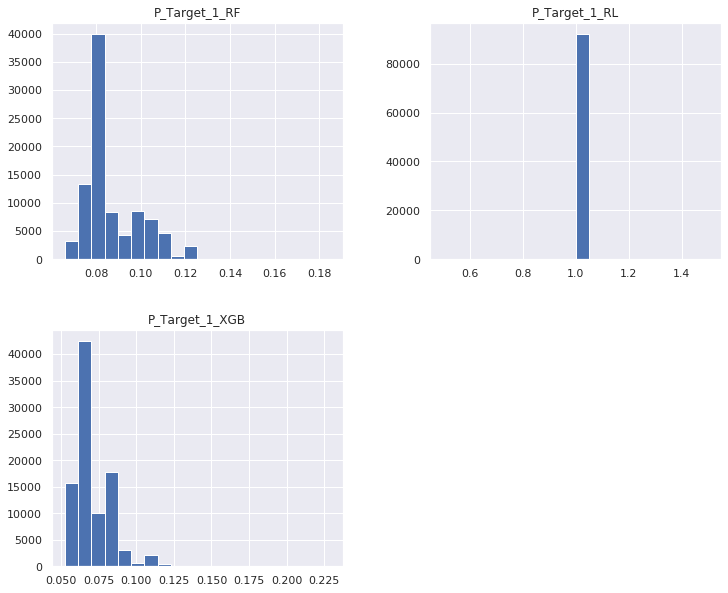

In [14]:
TuringHistogram(score_compare_valida[['P_Target_1_XGB','P_Target_1_RL','P_Target_1_RF']]) 

Turing Visualização de Dados - PairPlot


LinAlgError: singular matrix

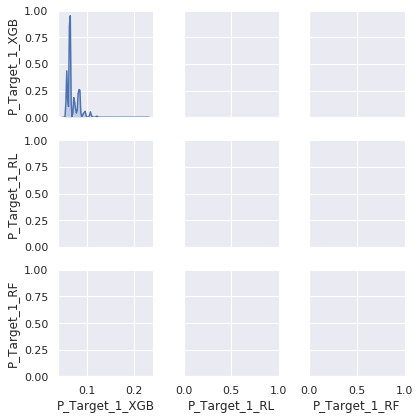

In [15]:
lista_vars = ['P_Target_1_XGB','P_Target_1_RL','P_Target_1_RF']
TuringDVPairPlot(score_compare_valida[['P_Target_1_XGB','P_Target_1_RL','P_Target_1_RF','C_Target_RL']],lista_vars,targetname='C_Target_RL',sizegraph=2,plot_s = 50)

'TuringNormalProbPlot'

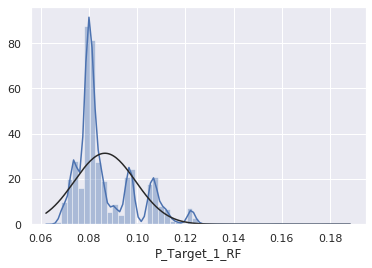

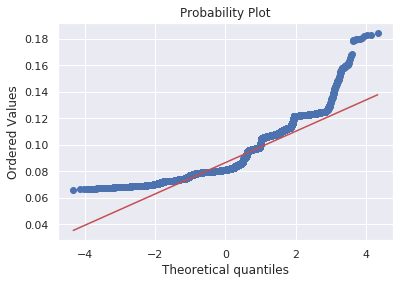

In [19]:
TuringNormalProbPlot(score_compare_valida,'P_Target_1_RF')

#### Verificando a ordenação do score gerado pelo modelo implantado

In [16]:
# Lendo tabela de desenvolvimento original do bucket da POC
path_file = 'Projetos/'+'Projeto_'+id_projeto+'/Modelo_Id_'+id_projeto+'/Modeltrain/'+'dbi_ordenacao.csv'
df_ord = TuringReadS3CSVFile(nm_bucket,path_file,sep=',')
df_ord.head(10)

,Unnamed: 0,id_ranks,tx_evento,qt_rank
0,0,0,1.000000,19
1,1,1,0.989130,92
2,2,2,0.969925,266
3,3,3,0.891551,793
4,4,4,0.793466,1806
5,5,5,0.614080,3949
6,6,6,0.434046,8612
7,7,7,0.248045,19694
8,8,8,0.054027,51345
9,9,9,0.007507,128681


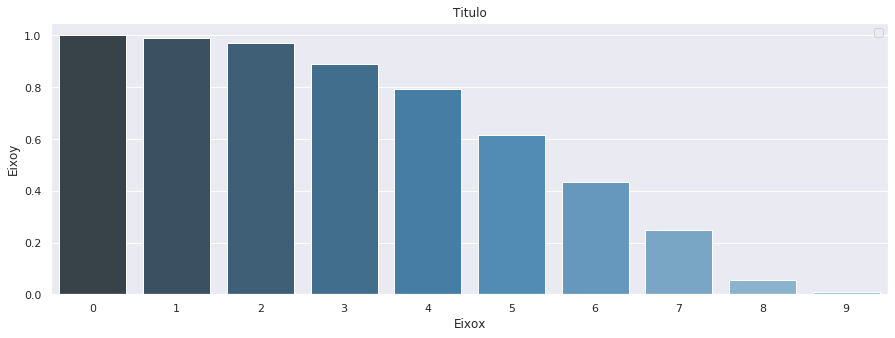

'TuringBarPlot'

In [17]:
TuringBarPlot(df_ord,'id_ranks','tx_evento',5,15,'Eixox','Eixoy','Titulo','')